In [272]:
import pandas as pd
from datetime import datetime,date
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [98]:
date_type1=pd.read_csv('/Users/rickie/Desktop/2020法定节假日.csv')
date_type2=pd.read_csv('/Users/rickie/Desktop/节假日信息.csv')

In [99]:
def is_holiday1(df):
    if df== 3 :
        return 1
    elif df== 2 :
        return 0
    else:
        return df
date_type1['is_holiday']=date_type1['code'].map(lambda x:is_holiday1(x))

In [100]:
date_type1['week_num']=date_type1['work_day'].map(lambda x:date.weekday(datetime.strptime(x,'%Y-%m-%d')))
def get_weekday(day):
    week_day_dict = {
    0 : '星期一',
    1 : '星期二',
    2 : '星期三',
    3 : '星期四',
    4 : '星期五',
    5 : '星期六',
    6 : '星期天',}
    return week_day_dict[day]
date_type1['weekday']=date_type1['week_num'].map(lambda x:get_weekday(x))


In [101]:
date_type1=date_type1.loc[:,['work_day','is_holiday','weekday']]
date_type1=date_type1.rename(columns={'work_day':'date'})
date_type1.head()

,date,is_holiday,weekday
0,2020-01-01,1,星期三
1,2020-01-02,0,星期四
2,2020-01-03,0,星期五
3,2020-01-04,1,星期六
4,2020-01-05,1,星期天


In [102]:
def is_holiday2(df):
    if df== 2 :
        return 1
    else:
        return df
date_type2['is_holiday']=date_type2['day_type'].map(lambda x:is_holiday2(x))



In [103]:
date_type2=date_type2.loc[:,['date','is_holiday','weekday']]
date_type2.head()

,date,is_holiday,weekday
0,2018-01-01,1,星期一
1,2018-01-02,0,星期二
2,2018-01-03,0,星期三
3,2018-01-04,0,星期四
4,2018-01-05,0,星期五


In [137]:
date_dt=pd.concat([date_type2,date_type1])

,date,is_holiday,weekday
0,2018-01-01,1,星期一
1,2018-01-02,0,星期二
2,2018-01-03,0,星期三
3,2018-01-04,0,星期四
4,2018-01-05,0,星期五


In [256]:
def get_weekday_num(weekday):
    week_day_dict = {
   '星期一':1,
    '星期二':2,
    '星期三':3,
    '星期四':4,
    '星期五':5,
    '星期六':6,
    '星期天':7,}
    return week_day_dict[weekday]
date_dt['week_num']=date_dt['weekday'].map(lambda x:get_weekday_num(x))
date_dt.head()

,date,is_holiday,weekday,week_num
0,2018-01-01,1,星期一,1
1,2018-01-02,0,星期二,2
2,2018-01-03,0,星期三,3
3,2018-01-04,0,星期四,4
4,2018-01-05,0,星期五,5


In [257]:
sales=pd.read_csv('/Users/rickie/Desktop/test_sales.csv')

In [258]:
sales_new=pd.merge(sales,date_dt,left_on='销售日期',right_on='date',how='left')
sales_new=sales_new.sort_values(by='销售日期')
sales_new=sales_new[(sales_new['销售金额']>=0)&(sales_new['销售日期']>='2019-01-01')&(sales_new['销售日期']<'2021-01-01')]
sales_new.set_index('销售日期',inplace=True)
sales_new.head()

,品牌名称,品牌ID,销售金额,同期销售金额,目标销售金额,date,is_holiday,weekday,week_num
销售日期,,,,,,,,,
2019-01-01,阿吉豆,1,4410637.0,2862106.0,4356503.0,2019-01-01,1.0,星期二,2.0
2019-01-02,阿吉豆,1,1680066.3,1143141.0,1754011.0,2019-01-02,0.0,星期三,3.0
2019-01-03,阿吉豆,1,1724730.8,1093145.0,1898129.0,2019-01-03,0.0,星期四,4.0
2019-01-04,阿吉豆,1,1960790.9,1121546.0,2264923.0,2019-01-04,0.0,星期五,5.0
2019-01-05,阿吉豆,1,3090074.4,1470267.0,3376765.0,2019-01-05,1.0,星期六,6.0


In [259]:
sales_new.is_holiday.value_counts()

0.0    501
1.0    230
Name: is_holiday, dtype: int64

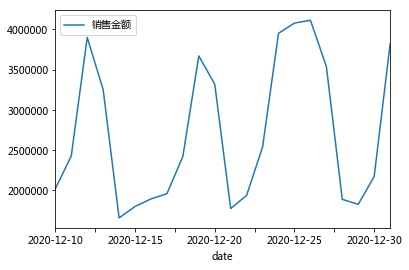

In [260]:
sales_new[sales_new['date']>='2020-12-10'].plot(x='date',y='销售金额')
plt.show()

In [283]:
features_df=sales_new[['同期销售金额','is_holiday','week_num']]
features=features_df.values
regress=sales_new['销售金额'].values
train_features,test_features,train_regress,test_regress=train_test_split(features,regress,test_size=0.3)
train_features

array([[  1.16318300e+06,   0.00000000e+00,   4.00000000e+00],
       [  1.67726500e+06,   0.00000000e+00,   3.00000000e+00],
       [  1.68206190e+06,   1.00000000e+00,   6.00000000e+00],
       ..., 
       [  1.32325700e+06,   0.00000000e+00,   5.00000000e+00],
       [  2.16014600e+06,   1.00000000e+00,   7.00000000e+00],
       [  1.48849100e+06,   0.00000000e+00,   4.00000000e+00]])

In [284]:
model=DecisionTreeRegressor()
model.fit(train_features,train_regress)
pred_y=model.predict(test_features)


In [285]:
mean_squared_error(pred_y,test_regress)

970321670470.1825

In [290]:
params={'max_depth':range(2,6)}
dtr=DecisionTreeRegressor()
model1=GridSearchCV(estimator=dtr,param_grid=params)
model1.fit(train_features,train_regress)
pred_y1=model1.predict(test_features)
print('最优MSE:',mean_squared_error(pred_y1,test_regress))
print('最优分数:',model1.best_score_)
print('最优分数:',model1.best_params_)

最优MSE: 777907363855.0
最优分数: 0.460302731491
最优分数: {'max_depth': 4}


In [291]:
combined_y=pd.DataFrame({'pred_y1':pred_y,'test_y':test_regress})
df=pd.DataFrame(index=features_df.index,data=regress)
df.columns=['test_y']
df_all=df.merge(combined_y,how='left')
df_all['error']=df_all['pred_y1']-df_all['test_y']

In [292]:
df_all

,test_y,pred_y1,error
0,4410637.00,NaN,NaN
1,1680066.30,NaN,NaN
2,1724730.80,2346918.60,622187.80
3,1960790.90,NaN,NaN
4,3090074.40,2663026.75,-427047.65
5,2915212.00,NaN,NaN
6,1639926.87,NaN,NaN
7,1714790.00,NaN,NaN
8,1726750.00,NaN,NaN
9,1901530.00,NaN,NaN


In [278]:
model.

2